In [1]:
!pip install modelscope opencv-python pillow matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 21.5 MB/s eta 0:00:00


In [2]:
!pip install addict yapf scipy opencv-python pillow matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 9.1 MB/s eta 0:00:00


In [3]:
!pip install "modelscope==1.9.5"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.8/298.8 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 449.6/449.6 kB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.5/99.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 8.5 MB/s eta 0:00:00
  Created whe

In [4]:
from modelscope.hub.snapshot_download import snapshot_download

model_dir = snapshot_download(
    "damo/cv_ddcolor_image-colorization",
    cache_dir="models"
)

model_dir


2025-12-09 03:20:07,049 - modelscope - INFO - PyTorch version 2.9.0+cu126 Found.
2025-12-09 03:20:07,054 - modelscope - INFO - TensorFlow version 2.19.0 Found.
2025-12-09 03:20:07,055 - modelscope - INFO - Loading ast index from /root/.cache/modelscope/ast_indexer
2025-12-09 03:20:07,056 - modelscope - INFO - No valid ast index found from /root/.cache/modelscope/ast_indexer, generating ast index from prebuilt!
2025-12-09 03:20:07,126 - modelscope - INFO - Loading done! Current index file version is 1.9.5, with md5 f095932be01f6c7a7d839621fa7470a7 and a total number of 945 components indexed
2025-12-09 03:20:09,435 - modelscope - WARNING - Model revision not specified, use revision: v1.02
Downloading: 100%|██████████| 1.39k/1.39k [00:00<00:00, 5.66MB/s]
Downloading: 100%|██████████| 235k/235k [00:00<00:00, 826kB/s]
Downloading: 100%|██████████| 199k/199k [00:00<00:00, 910kB/s]
Downloading: 100%|██████████| 94.9k/94.9k [00:00<00:00, 647kB/s]
Downloading: 100%|██████████| 117k/117k [00:00

'models/damo/cv_ddcolor_image-colorization'

In [5]:
from modelscope.pipelines import pipeline

ddcolor = pipeline(
    task="image-colorization",
    model=model_dir,
    device="cuda"  # pakai GPU Colab
)


/usr/local/lib/python3.12/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
2025-12-09 03:25:41,184 - modelscope - INFO - initiate model from models/damo/cv_ddcolor_image-colorization
2025-12-09 03:25:41,185 - modelscope - INFO - initiate model from location models/damo/cv_ddcolor_image-colorization.
2025-12-09 03:25:41,187 - modelscope - INFO - initialize model from models/damo/cv_ddcolor_image-colorization
2025-12-09 03:25:56,866 - modelscope - INFO - Loading DDColor model from models/damo/cv_ddcolor_image-colorization/pytorch_model.pt, with param key: [params].
2025-12-09 03:25:57,888 - modelscope - INFO - load model done.
2025-12-09 03:25:57,906 - modelscope - WARNING - No preprocessor field found in cfg.
2025-12-09 03:25:57,907 - modelscope - WARNING - No val key and type key found in 

In [6]:
from google.colab import files
uploaded = files.upload()

filename = list(uploaded.keys())[0]
filename


Saving bocil.jpg to bocil.jpg


'bocil.jpg'

In [7]:
import cv2

gray_img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
rgb_img = cv2.cvtColor(gray_img, cv2.COLOR_GRAY2RGB)

cv2.imwrite("rgb_output.png", rgb_img)


True

In [8]:
from PIL import Image
import numpy as np

result = ddcolor(filename)

# Output DDColor → numpy array (H, W, 3) BGR
img_np = result["output_img"]

# Convert BGR → RGB agar warnanya benar
img_rgb = img_np[:, :, ::-1]

# Convert numpy → PIL
img_pil = Image.fromarray(img_rgb)

# Simpan
img_pil.save("colorized_output.png")


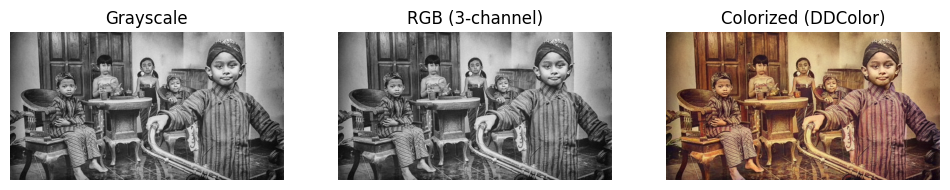

In [9]:
import matplotlib.pyplot as plt
from PIL import Image

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(gray_img, cmap='gray')
plt.title("Grayscale")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(rgb_img)
plt.title("RGB (3-channel)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(Image.open("colorized_output.png"))
plt.title("Colorized (DDColor)")
plt.axis("off")

plt.show()
